# [IAPR 2019:][iapr2019] Special project

**Group members:**
    1- first name and last name,
    2- first name and last name,
    3- first name and last name

**Due date:** 30.05.2019

[iapr2019]: https://github.com/LTS5/iapr-2019


## Description
Please find the description of this special project via [this link].

[this link]: https://github.com/LTS5/iapr-2019/blob/master/project/special_project_description.pdf

### Module Imports

In [1]:
import tarfile
import os
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Extracting data

In [57]:
#extracting tar file
# Project files
tar_path = os.path.join(os.getcwd(), 'project-data.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=os.getcwd())
    
# Competition files
tar_path = os.path.join(os.getcwd(), 'competition.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=os.getcwd())


### Importing data

In [2]:
data_path = './project-data'

#load train images
train_im_path = os.path.join(data_path,'images/train')
im_train_list = [os.path.join(train_im_path,f) for f in os.listdir(train_im_path)\
                 if (os.path.isfile(os.path.join(train_im_path, f)) and f.endswith('.jpg'))]

#load test images
test_im_path = os.path.join(data_path,'images/test')
im_test_list = [os.path.join(test_im_path,f) for f in os.listdir(test_im_path) \
                if (os.path.isfile(os.path.join(test_im_path, f)) and f.endswith('.jpg'))]

#load validation images
validation_im_path = os.path.join(data_path,'images/validation')
im_validation_list = [os.path.join(validation_im_path,f) for f in os.listdir(validation_im_path) \
                      if (os.path.isfile(os.path.join(validation_im_path, f)) and f.endswith('.jpg'))]

im_train = skimage.io.imread_collection(im_train_list)
im_test = skimage.io.imread_collection(im_test_list)
im_val = skimage.io.imread_collection(im_validation_list)



In [3]:
import xml.etree.ElementTree as ET

def parse_file(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymin').text)),
                              int(float(bbox.find('xmax').text))-int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymax').text))-int(float(bbox.find('ymin').text))]
        objects.append(obj_struct)

    return objects

In [4]:
#load train annotations

train_anno_path = os.path.join(data_path,'annotations/train')
anno_train = [parse_file(os.path.join(train_anno_path,f)) for f in os.listdir(train_anno_path)\
                 if (os.path.isfile(os.path.join(train_anno_path, f)) and f.endswith('.xml'))]

#load test annotations
test_anno_path = os.path.join(data_path,'annotations/test')
anno_test = [parse_file(os.path.join(test_anno_path,f)) for f in os.listdir(test_anno_path)\
                 if (os.path.isfile(os.path.join(test_anno_path, f)) and f.endswith('.xml'))]

#loaf validation annotations
validation_anno_path = os.path.join(data_path,'annotations/validation')
anno_val = [parse_file(os.path.join(validation_anno_path,f)) for f in os.listdir(validation_anno_path)\
                 if (os.path.isfile(os.path.join(validation_anno_path, f)) and f.endswith('.xml'))]




In [5]:
# competition images 
#load train images
comp_im_path = './competition'
im_comp_list = [os.path.join(comp_im_path,f) for f in os.listdir(comp_im_path)\
                 if (os.path.isfile(os.path.join(comp_im_path, f)) and f.endswith('.jpg'))]
im_comp = skimage.io.imread_collection(im_comp_list)

im_names_comp = [s[14:-4] for s in im_comp_list]
im_names_comp

['58ea52a5579e520dd055b3dc_32.00px_0',
 '58ea52a5579e520dd055b3dc_32.00px_1',
 '58ea52a5579e520dd055b3dc_32.00px_10',
 '58ea52a5579e520dd055b3dc_32.00px_11',
 '58ea52a5579e520dd055b3dc_32.00px_2',
 '58ea52a5579e520dd055b3dc_32.00px_3',
 '58ea52a5579e520dd055b3dc_32.00px_4',
 '58ea52a5579e520dd055b3dc_32.00px_5',
 '58ea52a5579e520dd055b3dc_32.00px_6',
 '58ea52a5579e520dd055b3dc_32.00px_7',
 '58ea52a5579e520dd055b3dc_32.00px_8',
 '58ea52a5579e520dd055b3dc_32.00px_9',
 '5902310d579e52581ddede9e_32.00px_0',
 '5902310d579e52581ddede9e_32.00px_1',
 '5902310d579e52581ddede9e_32.00px_10',
 '5902310d579e52581ddede9e_32.00px_11',
 '5902310d579e52581ddede9e_32.00px_2',
 '5902310d579e52581ddede9e_32.00px_3',
 '5902310d579e52581ddede9e_32.00px_4',
 '5902310d579e52581ddede9e_32.00px_5',
 '5902310d579e52581ddede9e_32.00px_6',
 '5902310d579e52581ddede9e_32.00px_7',
 '5902310d579e52581ddede9e_32.00px_8',
 '5902310d579e52581ddede9e_32.00px_9',
 '59496f73579e529fdea8af00_32.00px_0',
 '59496f73579e529fdea

In [379]:
def bbox_to_array(annotations):
    '''returns only the bbox of the annotations in a numpy array'''
    bbox_array = []
    for anno in annotations:
        if type(anno)== dict:
            bbox_array.append([anno['bbox'][0], anno['bbox'][1], anno['bbox'][2], anno['bbox'][3]])
            
        else:
            temp = []
            for bbox in anno:
                temp.append([bbox['bbox'][0], bbox['bbox'][1], bbox['bbox'][2], bbox['bbox'][3]])
            bbox_array.append(temp)
    return np.array(bbox_array)

def plot_images(images, annotations, names, subplots, figsize=(12, 12), bbox=True, bbox_type='dict'):
    '''plotting function
    Input:
        - images: either a single image or a list of images
        - annotations: list image annotations either in the original form dict or as an array for predicted bboxes
        - names: list of image names must be the same size as images
        - subplots: tuple or list of 2 elements specifying subplots organisation must correspond to the number of images
        - figsize: figure size
        - bbox: if true, draws the bbox rectangles
        - bbox_type: specify the annotations structure and type for easier handling
        '''
    
    fig, axes = plt.subplots(subplots[0], subplots[1], figsize=figsize)
    
    if bbox_type == 'dict':
        bbox_array = bbox_to_array(annotations)
    elif bbox_type == 'array':
        bbox_array = annotations
    else:
        raise NotImplementedError
    
    if subplots[0]*subplots[1]>1:
        for ax, im, nm, annotation in zip(axes.ravel(), images, names, bbox_array):
            # Iterate over annotations
            if bbox:
                for anno in annotation:
                    rect = patches.Rectangle((anno[0], anno[1]), anno[2], anno[3],
                            linewidth=1,edgecolor='g',facecolor='none')
                    ax.add_patch(rect)

            ax.imshow(im)
            ax.axis('off')
            ax.set_title(nm)
    
    else:
        if bbox:
            for anno in bbox_array:
                rect = patches.Rectangle((anno[0], anno[1]), anno[2], anno[3],
                        linewidth=1,edgecolor='g',facecolor='none')
                axes.add_patch(rect)
        axes.imshow(images)
        axes.axis('off')
        axes.set_title(names)
    
    plt.show()
    
    

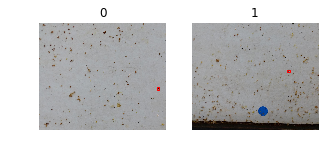

In [7]:
names = [i for i in range(2)]
plot_images(im_train[:2], anno_train[:2], names, [1,2], figsize=(5, 10), bbox=True, bbox_type='dict' )

#plot_images(im_train[8], anno_train[8], 'hey', [1,1], figsize=(20, 20), bbox=True, bbox_type='dict')


## Part 1: Finding varroas by segmentation
Add your implementation for ''**detect_by_segmentation**'' function. Please make sure the input and output follows the mentioned format.

In [380]:
import matplotlib.patches as mpatches

from skimage.filters import threshold_minimum, threshold_li, threshold_yen, wiener, gaussian, threshold_otsu, rank
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk, opening, binary_dilation
from skimage.color import label2rgb


def detect_by_segmentation(img, threshold_method=threshold_minimum, opening_size=13, 
                           dilation_size=16, filters=None, param_filter=None):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''
    
    #TODO: maybe try to apply different treatment on color channels instead of converting to RGB
    img_grey = skimage.color.rgb2grey(img)
    
    if (filters == wiener and param_filter):
        img_grey = filters(img_grey, K=param_filter)
    elif (filters == gaussian and param_filter):
        img_grey = filters(img_grey, sigma=param_filter)
    
    try:
        thresh = threshold_method(img_grey)
    except RuntimeError:
        thresh = threshold_li(img_grey)

    bw = opening(img_grey < thresh, square(opening_size))
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    
    dilated = binary_dilation(clear_border(bw), square(dilation_size))

    # label image regions
    label_image = label(dilated)
    
    varroa_pred = []
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 50 and region.area <= 2912:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            # condition so that elongated regions aren't selected since the regions we want to detect are circular
            if (maxc-minc)/(maxr - minr) > 0.16 and (maxc - minc)/(maxr - minr) < 6:
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                varroa_pred.append([minc, minr, maxc-minc, maxr-minr])
    
    return np.array(varroa_pred)
    
    

In [381]:
%matplotlib auto
plot_images(im_train[9], anno_train[9], 'Original', (1,1))

img_grey = skimage.color.rgb2grey(im_train[9])
    
try:
    thresh = threshold_minimum(img_grey)
except RuntimeError:
    thresh = threshold_li(img_grey)

plot_images(img_grey < thresh, anno_train[9], 'Thresholding', (1,1))

plot_images(opening(img_grey < thresh, square(9)), anno_train[9], 'Opening (square size =  9)', (1,1))

bw = opening(img_grey < thresh, square(9))
# remove artifacts connected to image border
cleared = clear_border(bw)
plot_images(cleared, anno_train[9], 'Cleared Border', (1,1))

    
dilated = binary_dilation(cleared, square(16))
plot_images(dilated, anno_train[9], 'Dilation', (1,1))


pred = detect_by_segmentation(im_train[9], threshold_method=threshold_minimum, opening_size=9, dilation_size=16, filters=None, param_filter=None)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(im_train[9])


# Displays ground truth         
for bbox in pred:
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=1 , edgecolor='r', facecolor='none', alpha=0.5)
    ax.add_patch(rect)

   # Displays ground truth         

for anno in anno_train[9]:
    bbox = anno['bbox']
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=1, edgecolor='g', facecolor='g', alpha=0.4)
    ax.add_patch(rect)    
    ax.set_title('Original (red) with predicted (green)')
    
test_detection([im_train[9]], [anno_train[9]], threshold_method_=threshold_minimum, opening_size_=9,
               dilation_size_=16, filters_=None, param_filter_=0.25)

Using matplotlib backend: Qt5Agg


(0.8970588235294118, 0.8472222222222222, 0.8714285714285713)

### IOU, f1 scores etc...

In [150]:
# Here we define the functions we need to calculate the iou of two boxes
# TODO: re check the overlapp area formula
def overlap_area(box1, box2):
    w = max(min(box1[0]+box1[2] - max(box1[0], box2[0]), box2[0]+box2[2] - max(box1[0], box2[0]), box2[0]+box2[2]),0)
    h = max(min(box1[1]+box1[3] - max(box1[1], box2[1]), box2[1]+box2[3] - max(box1[1], box2[1]), box2[1]+box2[3]),0)
    return w*h

def rect_area(box):
    return box[2]*box[3]

def union_area(box1, box2):
    return rect_area(box1)+rect_area(box2)-overlap_area(box1, box2)

def iou(box1, box2):
    return overlap_area(box1, box2)/union_area(box1, box2)



In [23]:
def calculate_errors(varroa_true, varroa_pred, threshold = 0.3):
    '''
    Calculates the number of true positive, false negative and false positive bewteen the 
    predicted boxes labels and the true ones. 
    '''
    tp = 0
    fn = 0
    fp = 0
    ious = []
    #we iterate over the real labels first in order to count false negatives and true positives
    for i in varroa_true:
        iou_temp = 0
        for j in varroa_pred:
            if iou(i, j) > iou_temp:
                iou_temp = iou(i, j)

        if iou_temp > threshold:
            tp +=1
        else:
            fn += 1
            
    #we also need to iterate over the predicted labels to find the false positive values
    for i in varroa_pred:
        iou_temp = 0
        for j in varroa_true:
            if iou(i,j) > iou_temp:
                iou_temp = iou(i, j)
        
        if iou_temp < threshold:
            fp +=1
    return tp, fn, fp

def give_stats(tp, fn, fp):
    '''
    calculates precision, recall and f1 score from true positive, false negative and false positive values
    '''
    try:
        precision = tp / (tp + fp)
    except ZeroDivisionError:
        precision = 0
    
    try:
        recall = tp / (tp + fn)
    except ZeroDivisionError:
        recall = 0
    
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        f1 = 0
        
    return precision, recall, f1


In [249]:
#testing these functions
true = bbox_to_array(anno_train[:6])
for i, im in enumerate( im_train[:6]):
    pred = detect_by_segmentation(im, threshold_method=threshold_minimum, opening_size=13,
                                  dilation_size=16, filters=None, param_filter=None)
    tp, fn, fp = calculate_errors(true[i], pred)
    
    print('Image {}: {} true positive, {} false negative and {} false positive'.format(i+1,tp,fn,fp))
    precision, recall, f1 = give_stats(tp, fn, fp)
    print('          precision = {:.2f}, recall = {:.2f}, f1-score = {:.2f}'.format(precision, recall, f1))

Image 1: 1 true positive, 0 false negative and 8 false positive
          precision = 0.11, recall = 1.00, f1-score = 0.20
Image 2: 1 true positive, 0 false negative and 0 false positive
          precision = 1.00, recall = 1.00, f1-score = 1.00
Image 3: 0 true positive, 0 false negative and 2 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 4: 0 true positive, 7 false negative and 0 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 5: 0 true positive, 0 false negative and 0 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 6: 0 true positive, 1 false negative and 1 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00


In [26]:
def test_detection(images, annotations, threshold_method_=threshold_minimum, opening_size_=13, 
                   dilation_size_=18, filters_=None, param_filter_=None):
    tp, fn, fp = 0, 0, 0
    true = bbox_to_array(annotations)
    for i, im in enumerate(images):
        pred = detect_by_segmentation(im, threshold_method=threshold_method_, opening_size=opening_size_, 
                                      dilation_size=dilation_size_, filters=filters_, param_filter=param_filter_)
        tp_i, fn_i, fp_i = calculate_errors(true[i], pred)
        tp += tp_i
        fn += fn_i
        fp += fp_i
    precision, recall, f1 = give_stats(tp, fn, fp)
    #print('precision = {:.2f}, recall = {:.2f}, f1-score = {:.2f}'.format(precision, recall, f1))
    return precision, recall, f1

In [357]:
%%time
#test on a few validation images
test_detection(im_val[:50], anno_val[:50], threshold_method_=threshold_minimum, opening_size_=9,
               dilation_size_=22, filters_=None, param_filter_=0.25)

#best: thresh_min, op_size=13, dil_size=16 or 18, no fli  (0.485)  0.39067

KeyboardInterrupt: 

## Part 2: Implement your first detector

Write your function(s) for the second part. Feel free to change the name of the function and add your additional functions, but please make sure their input and output follows the mentioned format.

In [17]:
# sliding window detection

def sliding_window(image, window_size=[200,200], stride=50):
    
    #zero padding:
    y, x = image.shape[0], image.shape[1]
    y_padd = stride-(y%stride)
    x_padd = stride-(x%stride)
    padded = skimage.util.pad(image, ((y_padd,0),(x_padd,0),(0,0)), mode='constant')
    for i in range((padded.shape[0]-window_size[0]/2)/stride):
        print(i)
    
    return padded
    

In [36]:
def is_inside(image, bbox):
    if bbox[0]<0 or bbox[0]>image.shape[1] or bbox[1]<0 or bbox[1]>image.shape[0]:
        return False
    else:
        return True


In [37]:
def extract_bbox(image, annotation, padd_x=15, padd_y=15, shape=None, bbox_type='dict'):
    """
    Extracts a window of the image aroung the bbox given as a parameter
    Input:
        - image: image to extract the window from
        - annotation: list of bbox (if array, bbox_type must be set to array)
    Output:
        - list of windows of original image around given bbox
    """
    if bbox_type == 'dict':
        annotation = bbox_to_array(annotation)
    bbox_windows = []
    im_y, im_x = image.shape[0], image.shape[1]
    for bbox in annotation:
        new_bbox = []
        if shape:
            padd_x = (shape[0]-bbox[2])//2
            padd_y = (shape[1]-bbox[3])//2
        new_bbox = [bbox[0]-padd_x, bbox[1]-padd_y, shape[0], shape[1]]
        
        if not is_inside(image, new_bbox):
            #conditions for x
            if new_bbox[0] < 0:
                new_bbox[0] = bbox[0]
            elif new_bbox[2]+new_bbox[0] > im_x:
                new_bbox[0] -= padd_x
            #conditions for y 
            if new_bbox[1] < 0:
                new_bbox[1] = bbox[1]
            elif new_bbox[3] > im_y:
                new_bbox[1] -= padd_y

        
        bbox_windows.append(image[new_bbox[1]:new_bbox[1]+new_bbox[3], new_bbox[0]:new_bbox[0]+new_bbox[2]])
     
    return bbox_windows


In [38]:
# Create a training set with false positives using segmentation with high recall
def extract_fp(images, annotations, )

SyntaxError: invalid syntax (<ipython-input-38-1bdf16efc2f9>, line 2)

In [ ]:
from skimage.measure import find_contours

def longest_contour(contour_list):
    max_cont = contour_list[np.argmax([len(contour) for contour in contour_list])]
    return max_cont


In [93]:

def fp_bbox(images, annotations):
    fp = []
    annotations_array = bbox_to_array(annotations)
    for im, anno in zip(images, annotations_array):
        pred = detect_by_segmentation(im, threshold_method=threshold_minimum, opening_size=3, dilation_size=16, 
                                      filters=None, param_filter=0.2)
        for p in pred:
            if sum([iou(p, a)for a in anno]) == 0:
                fp.append(p)
    return fp
        

In [160]:
fp = fp_bbox([im_train[771]], [anno_train[771]])
extract_bbox()

In [163]:
def generate_training(images, annotations):    
    tp_im = []
    fp_im = []
    for im, anno in zip(images, annotations): 
        tp_im += extract_bbox(im, anno, shape=[60,60])
        fp = fp_bbox([im], [anno])
        fp_im += extract_bbox(im, fp , shape=[60,60], bbox_type='array')
    return tp_im, fp_im

In [168]:
tp_im, fp_im = generate_training(im_train, anno_train)



In [214]:
np.random.choice(fp_im, len(tp_im), replace=False)

array([Array([[[157, 157, 157],
        [156, 156, 158],
        [156, 156, 158],
        ...,
        [171, 174, 181],
        [166, 169, 176],
        [169, 169, 179]],

       [[164, 165, 167],
        [157, 158, 162],
        [152, 153, 158],
        ...,
        [168, 171, 178],
        [166, 169, 176],
        [168, 168, 178]],

       [[163, 163, 171],
        [160, 160, 170],
        [155, 157, 169],
        ...,
        [165, 168, 173],
        [171, 174, 181],
        [170, 170, 180]],

       ...,

       [[165, 165, 173],
        [164, 164, 172],
        [162, 162, 170],
        ...,
        [162, 166, 177],
        [164, 168, 179],
        [163, 167, 178]],

       [[164, 164, 172],
        [163, 163, 171],
        [162, 162, 170],
        ...,
        [163, 167, 178],
        [166, 170, 181],
        [165, 169, 180]],

       [[165, 165, 175],
        [164, 164, 174],
        [162, 162, 170],
        ...,
        [160, 164, 175],
        [160, 164, 175],
        [157, 161

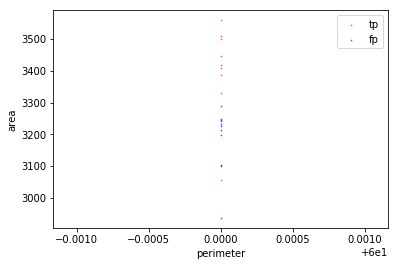

In [340]:
from skimage.measure import perimeter

def get_perim_area(image):
    im_gray = skimage.color.rgb2grey(image)
    try:
        thresh = threshold_minimum(im_gray)
    except RuntimeError:
        thresh = threshold_li(im_gray)
    binary = im_gray > thresh
    label_image = label(binary)
    perim = len(longest_contour_bboxes(image))
    #area = np.unique(binary, return_counts=True)[1][1]
    #for region in regionprops(label_image)
    area = max([region.area for region in regionprops(label_image)])
    return perim, area

def plot_perim_area(tps, fps):
    perimeters_tp = []
    perimeters_fp = [] 
    area_tp = [] 
    area_fp = []

    for tp, fp in zip(tps, fps):
        p_tp, a_tp = get_perim_area(tp)
        p_fp, a_fp = get_perim_area(fp)
        perimeters_tp.append(p_tp)
        perimeters_fp.append(p_fp)
        area_tp.append(a_tp)
        area_fp.append(a_fp)

    plt.scatter(perimeters_fp, area_fp, color='red', alpha=0.6, s=0.5)

    plt.scatter(perimeters_tp, area_tp, color='blue', alpha=0.6, s=0.5)

    plt.xlabel('perimeter')
    plt.ylabel('area')
    plt.legend(('tp','fp'))
    
plot_perim_area(tp_im[:10], fp_im[:10])

In [318]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

def train_knn(tps, fps, nn=150, classifier='SVM'):
    perimeters_tp = []
    perimeters_fp = [] 
    area_tp = [] 
    area_fp = []

    for tp, fp in zip(tps, fps):
        tp_gray = skimage.color.rgb2grey(tp)
        fp_gray = skimage.color.rgb2grey(fp)
        try:
            thresh_tp = threshold_minimum(tp_gray)
        except RuntimeError:
            thresh_tp = threshold_li(tp_gray)
            
        try:
            thresh_fp = threshold_minimum(fp_gray)        
        except RuntimeError:
            thresh_fp = threshold_li(fp_gray)
            
        tp_binary = tp_gray > thresh_tp
        fp_binary = fp_gray > thresh_fp
        perimeters_tp.append(perimeter(tp_binary))
        perimeters_fp.append(perimeter(fp_binary))
        area_tp.append(np.unique(tp_binary, return_counts=True)[1][1])
        area_fp.append(np.unique(fp_binary, return_counts=True)[1][1])

    area_perim_tp = np.transpose(np.stack((np.array(area_tp),np.array(perimeters_tp))))
    labels_tp = np.ones(area_perim_tp.shape[0])

    area_perim_fp = np.transpose(np.stack((np.array(area_fp),np.array(perimeters_fp))))
    labels_fp = np.zeros(area_perim_fp.shape[0])

    train_set = np.concatenate((area_perim_tp, area_perim_fp))
    train_labels = np.concatenate((labels_tp, labels_fp))
    
    
    if classifier == 'SVM':
        clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
        clf.fit(train_set, train_labels)
        return clf
    
    if classifier == 'knn':
        neigh = KNeighborsClassifier(n_neighbors=nn)
        neigh.fit(train_set, train_labels)
        return neigh

#knn = train_knn(tp_im, fp_im)
svm = train_knn(tp_im, fp_im, classifier = 'SVM')

#knn = train_knn(tp_im[:3000],np.random.choice(fp_im, len(tp_im)//8, replace=False))

In [332]:
def predict_with_knn(img, model):
    bbox_all = detect_by_segmentation(img, threshold_method=threshold_minimum, opening_size=3, 
                           dilation_size=16, filters=None, param_filter=None)
    
    bbox_window = extract_bbox(img, bbox_all, padd_x=15, padd_y=15, shape=(60,60), bbox_type='array')
    bbox_pred = []
    for i, window in enumerate(bbox_window):
        p, a = get_perim_area(window)
        point = np.array([a, p])
        if a < (-1.5*p +3800):
#         if model.predict(point.reshape(1,-1)) == 1:
            bbox_pred.append(bbox_all[i])
    return bbox_pred

In [333]:
#testing these functions
true = bbox_to_array(anno_train[10:16])
for i, im in enumerate( im_train[10:16]):
    pred = predict_with_knn(im, svm)
    tp, fn, fp = calculate_errors(true[i], pred)
    
    print('Image {}: {} true positive, {} false negative and {} false positive'.format(i+1,tp,fn,fp))
    precision, recall, f1 = give_stats(tp, fn, fp)
    print('          precision = {:.2f}, recall = {:.2f}, f1-score = {:.2f}'.format(precision, recall, f1))

Image 1: 0 true positive, 0 false negative and 3 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 2: 0 true positive, 0 false negative and 6 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 3: 0 true positive, 0 false negative and 4 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00
Image 4: 2 true positive, 0 false negative and 5 false positive
          precision = 0.29, recall = 1.00, f1-score = 0.44
Image 5: 10 true positive, 11 false negative and 58 false positive
          precision = 0.15, recall = 0.48, f1-score = 0.22
Image 6: 0 true positive, 0 false negative and 19 false positive
          precision = 0.00, recall = 0.00, f1-score = 0.00


In [258]:
def test_detection_knn(images, annotations, threshold_method_=threshold_minimum, opening_size_=13, 
                   dilation_size_=18, filters_=None, param_filter_=None):
    tp, fn, fp = 0, 0, 0
    true = bbox_to_array(annotations)
    for i, im in enumerate(images):
        pred = predict_with_knn(im, knn)
        tp_i, fn_i, fp_i = calculate_errors(true[i], pred)
        tp += tp_i
        fn += fn_i
        fp += fp_i
    precision, recall, f1 = give_stats(tp, fn, fp)
    #print('precision = {:.2f}, recall = {:.2f}, f1-score = {:.2f}'.format(precision, recall, f1))
    return precision, recall, f1

In [334]:
%%time
#test on a few validation images
test_detection_knn(im_test[:20], anno_test[:20], threshold_method_=threshold_minimum, opening_size_=13,
               dilation_size_=16, filters_=None, param_filter_=0.25)

#best: thresh_min, op_size=13, dil_size=16 or 18, no fli  (0.485)

Wall time: 2min 45s


(0.20439963336388633, 0.5186046511627908, 0.29322813938198555)

In [336]:

x = extract_bbox(im_train[771], anno_train[771], shape=[50,50])


def longest_contour_bboxes(bbox_list):
    try:
        return [longest_contour(find_contours(skimage.color.rgb2grey(x_), threshold_minimum(skimage.color.rgb2grey(x_))))for x_ in bbox_list]
    except RuntimeError:
        return [longest_contour(find_contours(skimage.color.rgb2grey(x_), threshold_li(skimage.color.rgb2grey(x_))))for x_ in bbox_list]

contours_true = longest_contour_bboxes(tp_im[:1000])
contours_false = longest_contour_bboxes(fp_im[:1000])

def contour_DFT(contour, l):
    """
    """
    mu_list = []
    for (y, x) in contour:
        mu_list.append(x+y*1j)
    
    if len(mu_list) <= 0:
        raise ValueError('list of points is empty')
        
    N = len(mu_list)
    f = 0 + 0.j
    for k, mu in enumerate(mu_list):   
        # DFT computation with normalization
        f += mu*np.exp(-2*np.pi*1j*k*l/N)

    return np.abs(f)

fourier_coeff_true = [[contour_DFT(cont, l) for l in [1,2,3,4,5]] for cont in contours_true]
fourier_coeff_false = [[contour_DFT(cont, l) for l in [1,2,3,4,5]] for cont in contours_false]


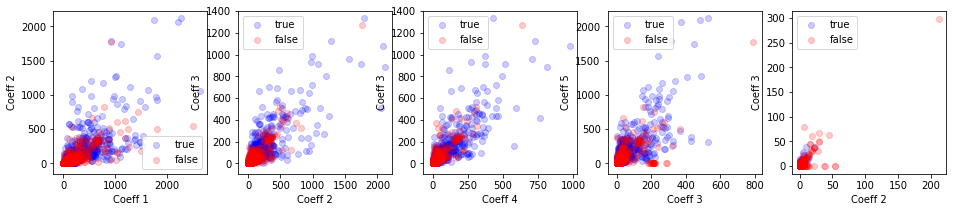

In [310]:
fourier_coeff_true = [[contour_DFT(cont, l) for l in [1,2,3,4,5]] for cont in contours_true]
fourier_coeff_false = [[contour_DFT(cont, l) for l in [1,2,3,4,5]] for cont in contours_false]

# Plot images
fig, axes = plt.subplots(1,5 , figsize=(16, 3))

axes[0].scatter(np.array(fourier_coeff_true)[:,0], np.array(fourier_coeff_true)[:,1], color='blue', alpha=0.2)
axes[0].scatter(np.array(fourier_coeff_false)[:,0], np.array(fourier_coeff_false)[:,1], color='red', alpha=0.2)
axes[0].set(xlabel='Coeff 1', ylabel='Coeff 2')
axes[0].legend(('true','false'))

axes[1].scatter(np.array(fourier_coeff_true)[:,1], np.array(fourier_coeff_true)[:,2], color='blue', alpha=0.2)
axes[1].scatter(np.array(fourier_coeff_false)[:,1], np.array(fourier_coeff_false)[:,2], color='red', alpha=0.2)
axes[1].set(xlabel='Coeff 2', ylabel='Coeff 3')
axes[1].legend(('true','false'))


axes[2].scatter(np.array(fourier_coeff_true)[:,3], np.array(fourier_coeff_true)[:,2], color='blue', alpha=0.2)
axes[2].scatter(np.array(fourier_coeff_false)[:,3], np.array(fourier_coeff_false)[:,2], color='red', alpha=0.2)
axes[2].set(xlabel='Coeff 4', ylabel='Coeff 3')
axes[2].legend(('true','false'))

axes[3].scatter(np.array(fourier_coeff_true)[:,4], np.array(fourier_coeff_true)[:,1], color='blue', alpha=0.2)
axes[3].scatter(np.array(fourier_coeff_false)[:,4], np.array(fourier_coeff_false)[:,1], color='red', alpha=0.2)
axes[3].set(xlabel='Coeff 3', ylabel='Coeff 5')
axes[3].legend(('true','false'))

axes[4].scatter(np.array(fourier_coeff_true)[:,4]/np.array(fourier_coeff_true)[:,3], np.array(fourier_coeff_true)[:,2]/np.array(fourier_coeff_true)[:,3], color='blue', alpha=0.2)
axes[4].scatter(np.array(fourier_coeff_false)[:,4]/np.array(fourier_coeff_true)[:,3], np.array(fourier_coeff_false)[:,2]/np.array(fourier_coeff_true)[:,3], color='red', alpha=0.2)
axes[4].set(xlabel='Coeff 2', ylabel='Coeff 3')
axes[4].legend(('true','false'))

In [290]:
print(contours_true[0].shape)
print(contour_DFT(contours_true[0],2))
np.abs(np.fft.fft(contours_true[0][:,0] + 1j*contours_true[0][:,1]))

(107, 2)
62.80898315911432


array([4.51788367e+03, 1.16505494e+03, 2.06746128e+02, 1.99142957e+01,
       3.94296819e+01, 1.74245445e+01, 1.41038171e+01, 1.59862007e+01,
       1.68574641e+01, 2.22227110e+01, 1.24244721e+01, 4.74126149e+00,
       3.96779606e+00, 1.10400599e+01, 7.27971245e+00, 5.94182426e+00,
       3.25747019e+00, 6.57125711e+00, 9.58660812e+00, 4.27502935e+00,
       4.39473953e+00, 2.68318655e+00, 4.07821047e+00, 2.31427421e+00,
       2.67376333e+00, 1.29544571e+00, 1.53251683e+00, 2.97986385e+00,
       4.20381185e+00, 3.58308350e+00, 2.61505032e+00, 1.62466835e+00,
       1.28541743e+00, 2.74501550e+00, 7.92215400e-01, 2.77656298e+00,
       1.66693849e+00, 2.99808518e+00, 3.82651195e+00, 3.41350791e+00,
       2.48449795e+00, 1.01106376e+00, 1.49035358e+00, 6.06134099e-01,
       2.09479233e+00, 5.98447842e-01, 2.44011697e+00, 7.10244520e-01,
       3.48759484e+00, 1.88018147e+00, 2.86454193e+00, 8.88724716e-01,
       2.11798344e+00, 1.27386215e+00, 2.09445065e+00, 3.01304569e+00,
      

# Fourier

In [ ]:
def Fourier_descriptor(img):
    
    try:
        T = skimage.filters.threshold_minimum(img)
    except RuntimeError:
        T = skimage.filters.threshold_yen(img)
   # if img.shape[0]*img.shape[1] > max(img.shape[0],img.shape[1]):
  
    contours = measure.find_contours(skimage.filters.gaussian(img,0.1,preserve_range = True),T,fully_connected = 'high', positive_orientation = 'high')
    if contours != []: ##################
        index = max(contours, key = len)
        contour = index.astype(int)
        contour_complex = np.empty(contour.shape[:-1], dtype=complex)
        contour_complex.real = contour[:, 0]
        contour_complex.imag = contour[:, 1]
        fourrier = np.abs(np.fft.fft(contour_complex)) 
        if len(fourrier) >=4:
            A1 = fourrier[1]
            A2 = fourrier[2]
            A3 = fourrier[3]
            if A3!= 0:
                return A1/A3 , A2/A3
            return 0, 0
        return 0 , 0
    return 0 , 0
   


        
def plotting_Descriptors(images):
    
    a = 0
    fig, axes = plt.subplots(1,1, figsize=(16, 4))
    for i in range (len(images)):
        F1 , F2 = Fourier_descriptor(images[i])
        a+= 1
        axes.plot(F1, F2,'xr' ,linewidth=2)
    axes.set(xlabel = 'A1/A3',ylabel ='A2/A3')  
    print(a,len(images))

In [81]:
print(len(contours))

122


In [ ]:
def detect_by_method_1(img):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''

    #Your code

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [ ]:
#Your code

## Part 3: Using MLP and CNNs

Add your implementation for the thrid part. Feel free to add your desirable functions, but please make sure you have proper functions for the final detection, where their input and output follows the same format as the previous parts.

In [5]:
#Your code

## Challenge

You can generate a json submission file by using the function ''**generate_pred_json**''. This prediction file can be uploaded online for evaluation (Please refer to section 3 of the project description for more details).

In [230]:
len(im_names_comp)

259

In [232]:
pred = [detect_by_segmentation(im, threshold_method=threshold_minimum, opening_size=13,
               dilation_size=16, filters=None, param_filter=0.2) for im in im_comp]

In [233]:
submission = dict(zip(im_names_comp, pred))

In [127]:
import numpy as np
import json

def generate_pred_json(data, tag='baseline'):
    '''
    Input
    - data: Is a dictionary d, such that:
          d = { 
              "ID_1": [], 
              "ID_2": [[x_21, y_21, w_21, h_21], [x_22, y_22, w_22, h_22]], 
              ... 
              "ID_i": [[x_i1, y_i1, w_i1, h_i1], ..., [x_iJ, y_iJ, w_iJ, h_iJ]],
              ... 
              "ID_N": [[x_N1, y_N1, w_N1, h_N1]],
          }
          where ID is the string id of the image (e.i. 5a05e86fa07d56baef59b1cb_32.00px_1) and the value the Kx4 
          array of intergers for the K predicted bounding boxes (e.g. [[170, 120, 15, 15]])
    - tag: (optional) string that will be added to the name of the json file.
    Output
      Create a json file, "prediction_[tag].json", conatining the prediction to EvalAI format.
    '''
    unvalid_key = []
    _data = data.copy()
    for key, value in _data.items():
        try:
            # Try to convert to numpy array and cast as closest int
            print(key)
            v = np.around(np.array(value)).astype(int)
            # Check is it is a 2d array with 4 columns (x,y,w,h)
            if v.ndim != 2 or v.shape[1] != 4:
                unvalid_key.append(key)
            # Id must be a string
            if not isinstance(key, str):
                unvalid_key.append(key)
            _data[key] = v.tolist()
        # Deal with not consistant array size and empty predictions
        except (ValueError, TypeError):
            unvalid_key.append(key)
            print('invalid key')
    # Remove unvalid key from dictionnary
    for key in unvalid_key: del _data[key]
    
    with open('prediction_{}.json'.format(tag), 'w') as outfile:
        json.dump(_data, outfile)

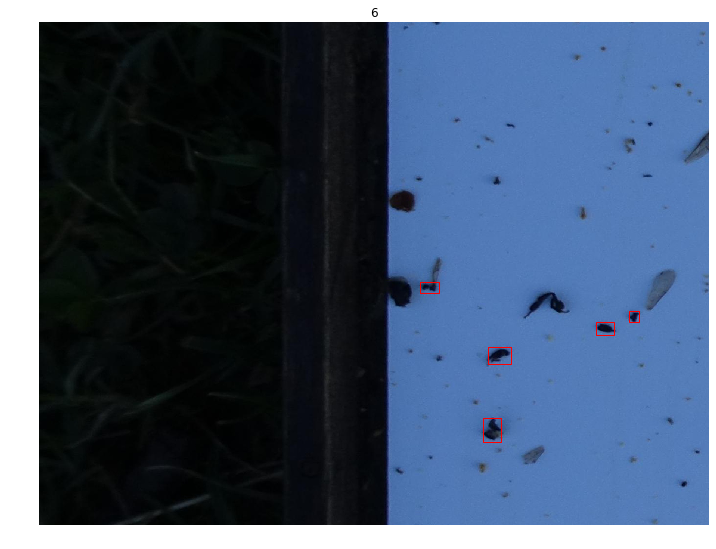

In [134]:
names = [i for i in range(12)]
plot_images(im_comp[6], pred[6], '6', [1,1], figsize=(12, 12), bbox=True, bbox_type='array' )


In [235]:
generate_pred_json(submission)

58ea52a5579e520dd055b3dc_32.00px_0
58ea52a5579e520dd055b3dc_32.00px_1
58ea52a5579e520dd055b3dc_32.00px_10
58ea52a5579e520dd055b3dc_32.00px_11
58ea52a5579e520dd055b3dc_32.00px_2
58ea52a5579e520dd055b3dc_32.00px_3
58ea52a5579e520dd055b3dc_32.00px_4
58ea52a5579e520dd055b3dc_32.00px_5
58ea52a5579e520dd055b3dc_32.00px_6
58ea52a5579e520dd055b3dc_32.00px_7
58ea52a5579e520dd055b3dc_32.00px_8
58ea52a5579e520dd055b3dc_32.00px_9
5902310d579e52581ddede9e_32.00px_0
5902310d579e52581ddede9e_32.00px_1
5902310d579e52581ddede9e_32.00px_10
5902310d579e52581ddede9e_32.00px_11
5902310d579e52581ddede9e_32.00px_2
5902310d579e52581ddede9e_32.00px_3
5902310d579e52581ddede9e_32.00px_4
5902310d579e52581ddede9e_32.00px_5
5902310d579e52581ddede9e_32.00px_6
5902310d579e52581ddede9e_32.00px_7
5902310d579e52581ddede9e_32.00px_8
5902310d579e52581ddede9e_32.00px_9
59496f73579e529fdea8af00_32.00px_0
59496f73579e529fdea8af00_32.00px_1
59496f73579e529fdea8af00_32.00px_10
59496f73579e529fdea8af00_32.00px_11
59496f73579e52